In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import utils.eval_funcs as eval_funcs
import matplotlib.colors 
import json
import analysis.fig_distrib_comparison_plot

In [2]:
colors = { 'Negative' : 'magenta', 'Neutral' : 'cyan' }
stars_color = '#007bff'
bin_labels = ['Negative', 'Neutral']

# Lethals in the TGI Dataset

In [3]:
smf_df = pd.read_csv('../generated-data/task_yeast_smf_30')
lethal_genes = set(smf_df[smf_df['bin'] == 0]['gene'])

In [4]:
tgi_df = pd.read_csv('../generated-data/task_yeast_tgi')

In [5]:
tgi_genes = set(tgi_df['a']) | set(tgi_df['b']) | set(tgi_df['c'])

In [6]:
print("Lethals: %d" % len(lethal_genes))
print("Genes in TGI: %d" % len(tgi_genes))
print("Lethal genes in TGI: %d" % len(lethal_genes.intersection(tgi_genes)))

Lethals: 839
Genes in TGI: 1300
Lethal genes in TGI: 226


# Shared SGO Terms

In [21]:
d = np.load('../generated-data/features/ppc_yeast_common_sgo.npz')

In [22]:
F = d['F']
terms = d['feature_labels']

with open('../generated-data/go_ids_to_names.json', 'r') as f:
    gene_ids_to_terms = json.load(f)

terms = [gene_ids_to_terms[t] for t in terms]

In [23]:
neg_df = tgi_df[tgi_df['bin'] == 0]

In [24]:
n_terms_shared = [[], []]
zero_terms = [0, 0]
for a_id, b_id, c_id, thebin in zip(tgi_df['a_id'], tgi_df['b_id'], tgi_df['c_id'], tgi_df['bin']):
    a_terms = F[a_id, :]
    b_terms = F[b_id, :]
    c_terms = F[c_id, :]
    thebin = int(thebin)
    
    shared = []
    for i in range(1, 4):
        n = np.sum((a_terms + b_terms + c_terms) >= i)
        shared.append(n)
    
    n_terms_shared[thebin].append(shared)
    
    n_zero_terms = np.sum((a_terms + b_terms + c_terms) == 0) == F.shape[1]
    zero_terms[thebin] += n_zero_terms 
zero_terms

[2, 76]

In [25]:
neg_n_terms = np.array(n_terms_shared[0])
net_n_terms = np.array(n_terms_shared[1])


In [26]:
threshold = 2
max_N = np.maximum(np.max(neg_n_terms[:,threshold-1]), np.max(net_n_terms[:,threshold-1]))
R = np.zeros((2, max_N+1))
for thebin in [0, 1]:
    class_terms = neg_n_terms if thebin == 0 else net_n_terms
    for n_terms_shared in range(R.shape[1]):
        R[thebin, n_terms_shared] = np.sum(class_terms[:,threshold-1] == n_terms_shared)

rows = []
for thebin in range(R.shape[0]):
    for n_terms_shared in range(max_N):
        y = R[thebin, n_terms_shared] * 100 / np.sum(R[thebin, :])
        rows.append({
            "hue" : bin_labels[thebin],
            "x" : n_terms_shared,
            "y" : y,
            "raw_y" : R[thebin, n_terms_shared]
        })
df = pd.DataFrame(rows)

[[2.3999e+04 9.1000e+02]
 [3.0284e+04 1.1080e+03]
 [1.5022e+04 6.8700e+02]
 [2.1240e+03 1.1100e+02]
 [1.9400e+02 1.7000e+01]]
[[24909.]
 [31392.]
 [15709.]
 [ 2235.]
 [  211.]]
[[71623.  2833.]]
[[2.39612295e+04 9.47770455e+02]
 [3.01975558e+04 1.19444418e+03]
 [1.51112833e+04 5.97716732e+02]
 [2.14995977e+03 8.50402251e+01]
 [2.02971594e+02 8.02840604e+00]]


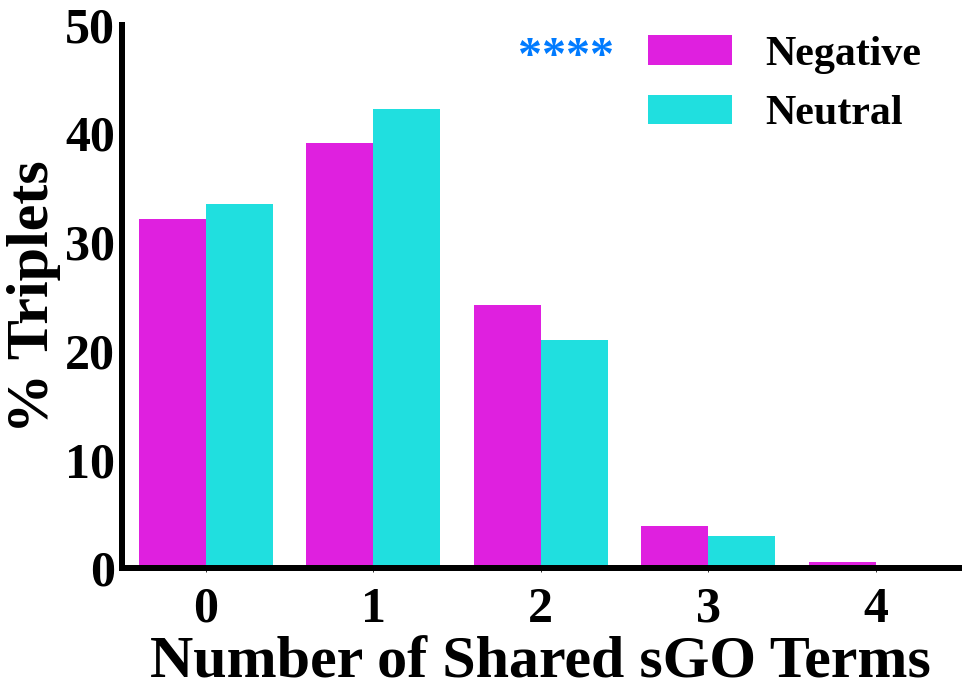

In [28]:
analysis.fig_distrib_comparison_plot.plot_distrib(df, colors, 
                                                  'Number of Shared sGO Terms', '% Triplets', 5,
                                                 [0, 50], stars_color, "../figures/yeast_tgi_sgo.png")

# Shortest Path Length

In [29]:
d = np.load('../generated-data/pairwise_features/ppc_yeast_shortest_path_len.npy')

In [30]:
scls = [[], []]
for a_id, b_id, c_id, thebin in zip(tgi_df['a_id'], tgi_df['b_id'], tgi_df['c_id'], tgi_df['bin']):
    
    thebin = int(thebin)
    
    ab_spl = d[a_id, b_id]
    ac_spl = d[a_id, c_id]
    bc_spl = d[b_id, c_id]
    scl = np.sum([ab_spl, ac_spl, bc_spl])
    scls[thebin].append(scl)
scls[0] = np.array(scls[0])
scls[1] = np.array(scls[1])

[[8.0000e+00 1.0000e+00]
 [1.0400e+02 1.0000e+01]
 [1.7940e+03 7.5000e+01]
 [1.0007e+04 5.2100e+02]
 [1.1477e+04 5.1700e+02]
 [2.1519e+04 7.6800e+02]
 [1.3274e+04 4.1800e+02]
 [7.3430e+03 2.2200e+02]
 [3.0010e+03 8.2000e+01]
 [1.6510e+03 1.2000e+02]
 [1.1040e+03 8.1000e+01]
 [2.4500e+02 1.3000e+01]
 [8.4000e+01 6.0000e+00]
 [1.5000e+01 1.0000e+00]
 [2.0000e+00 0.0000e+00]]
[[9.0000e+00]
 [1.1400e+02]
 [1.8690e+03]
 [1.0528e+04]
 [1.1994e+04]
 [2.2287e+04]
 [1.3692e+04]
 [7.5650e+03]
 [3.0830e+03]
 [1.7710e+03]
 [1.1850e+03]
 [2.5800e+02]
 [9.0000e+01]
 [1.6000e+01]
 [2.0000e+00]]
[[71628.  2835.]]
[[8.65734660e+00 3.42653398e-01]
 [1.09659724e+02 4.34027638e+00]
 [1.79784231e+03 7.11576891e+01]
 [1.01271717e+04 4.00828331e+02]
 [1.15373572e+04 4.56642762e+02]
 [2.14384760e+04 8.48524032e+02]
 [1.31707100e+04 5.21290037e+02]
 [7.27698078e+03 2.88019218e+02]
 [2.96562217e+03 1.17377825e+02]
 [1.70357343e+03 6.74265743e+01]
 [1.13988397e+03 4.51160308e+01]
 [2.48177269e+02 9.82273075e+00]

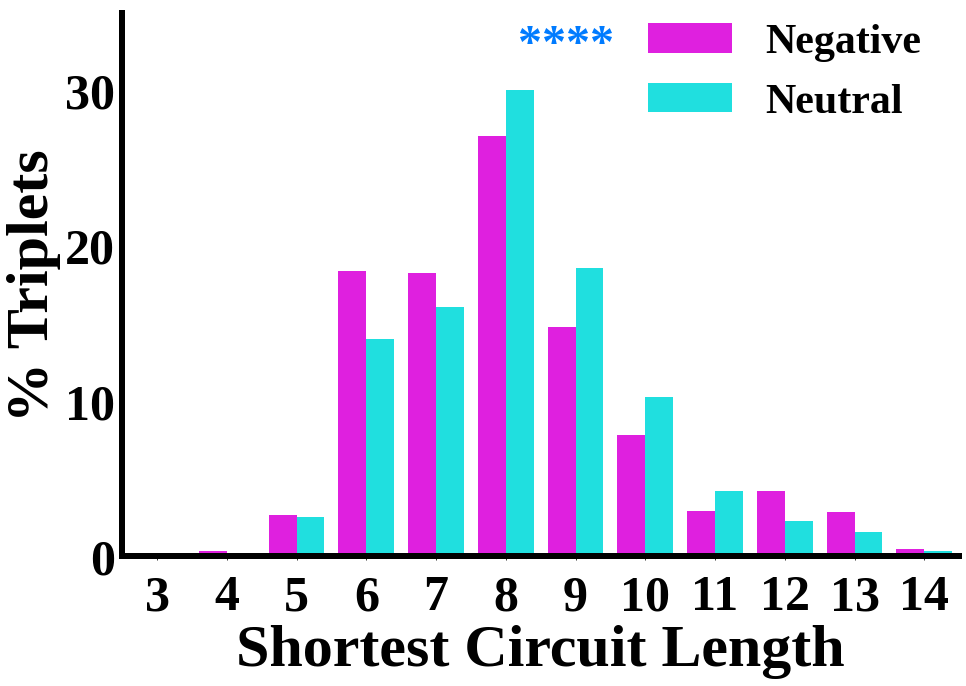

In [32]:
max_circuit_length = np.maximum(np.max(scls[0]), np.max(scls[1]))
min_circuit_length = np.minimum(np.min(scls[0]), np.min(scls[1]))
n_categories = int(max_circuit_length - min_circuit_length + 1)

R = np.zeros((2, n_categories))
for thebin in [0, 1]:
    for i, scl in enumerate(np.arange(min_circuit_length, max_circuit_length + 1)):
        R[thebin, i] = np.sum(scls[thebin] == scl)

rows = []
for thebin in range(R.shape[0]):
    for i in range(R.shape[1]):
        y = R[thebin, i] * 100 / np.sum(R[thebin, :])
        rows.append({
            "hue" : bin_labels[thebin],
            "x" : int(min_circuit_length + i),
            "y" : y,
            "raw_y" : R[thebin, i]
        })
df = pd.DataFrame(rows)
analysis.fig_distrib_comparison_plot.plot_distrib(df, colors, 
                                                  'Shortest Circuit Length', '% Triplets', 0,
                                                 [0, 35], stars_color, "../figures/yeast_tgi_scl_details.png",
                                                 xlim=[-0.5, 11.5])

# Shortest Circuit Length Summary

[[23390.  1124.]
 [48238.  1711.]]
[[24514.]
 [49949.]]
[[71628.  2835.]]
[[23580.68828814   933.31171186]
 [48047.31171186  1901.68828814]]


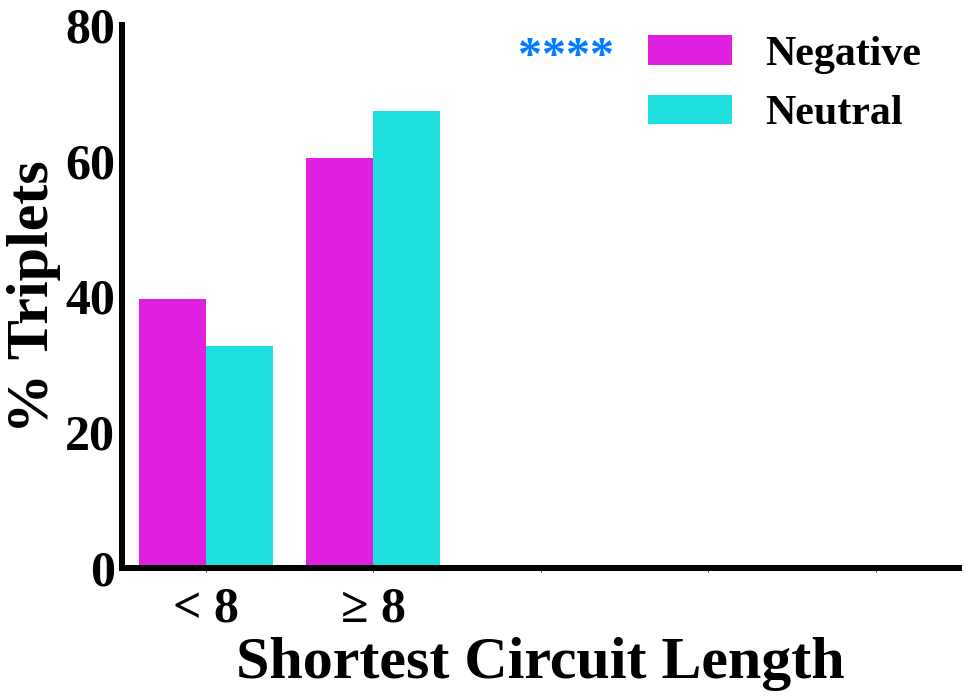

In [33]:

cutoff = 8
R = np.array([
    [ np.sum(np.array(scls[0]) < cutoff), np.sum(np.array(scls[0]) >= 8) ],
    [ np.sum(np.array(scls[1]) < cutoff), np.sum(np.array(scls[1]) >= 8) ],
])

rows = []
for thebin in range(R.shape[0]):
    for k, lbl in enumerate(['< %d' % cutoff, '≥ %d' % cutoff]):
        y = R[thebin, k] * 100 / np.sum(R[thebin, :])
        rows.append({
            "hue" : bin_labels[thebin],
            "x" : lbl,
            "y" : y,
            "raw_y" : R[thebin, k]
        })
df = pd.DataFrame(rows)
analysis.fig_distrib_comparison_plot.plot_distrib(df, colors, 
    'Shortest Circuit Length', '% Triplets', 5,
    [0, 80], stars_color, "../figures/yeast_tgi_scl_summary.png")